In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install sidetable
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# load data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\week6\data\data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
df.shape

(95662, 16)

In [7]:
# check target balance (BAD)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [8]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


In [10]:
df['ProductCategory'] = df['ProductCategory'].astype('category').cat.codes
df=df.drop(columns=['CountryCode'])

In [11]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,0,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,2,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,0,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,8,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,2,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [12]:
# Convert ProductCategory from object to numerical categories using LabelEncoder

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
df['ProductCategory'] = label_encoder.fit_transform(df['ProductCategory'])

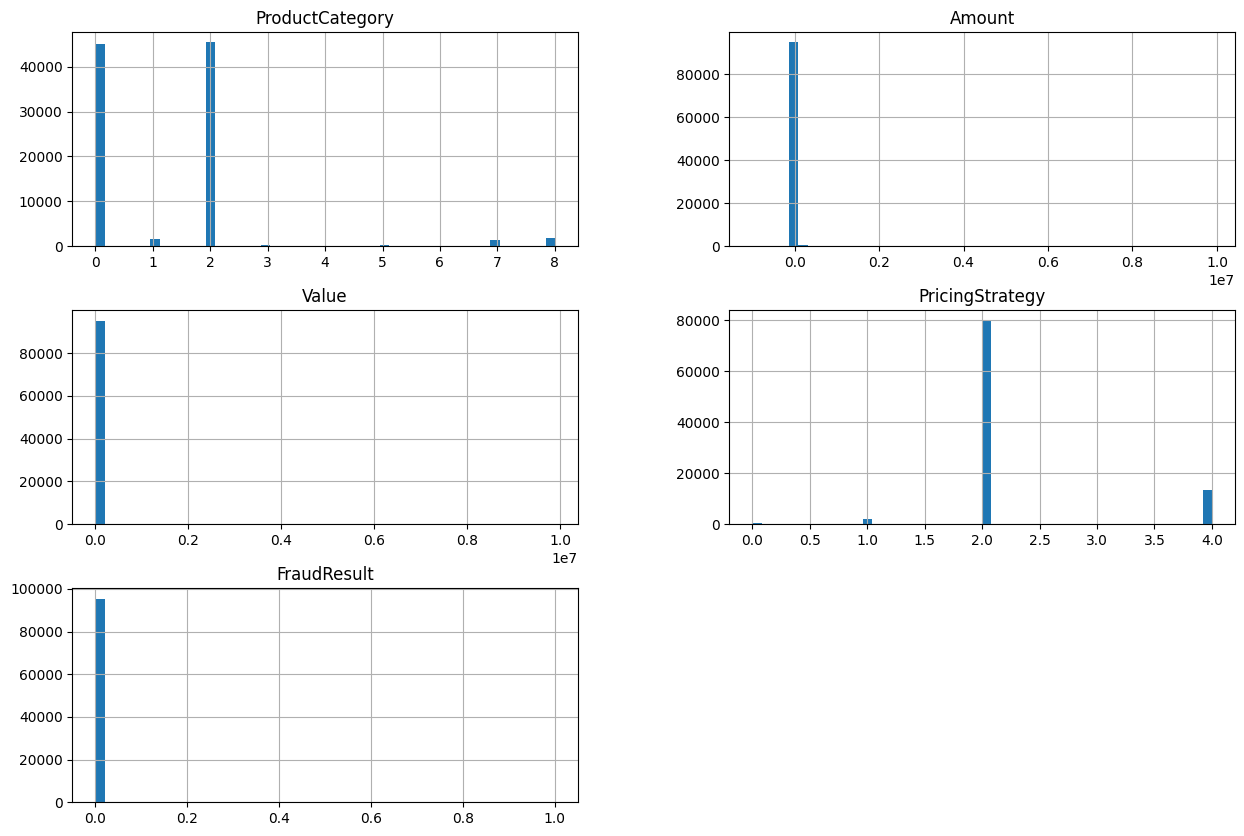

In [13]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

In [14]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [15]:
numeric_df.corr()

,ProductCategory,Amount,Value,PricingStrategy,FraudResult
ProductCategory,1.000000,0.043508,0.033366,-0.294912,0.028691
Amount,0.043508,1.000000,0.989692,-0.061931,0.557370
Value,0.033366,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.294912,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.028691,0.557370,0.566739,-0.033821,1.000000


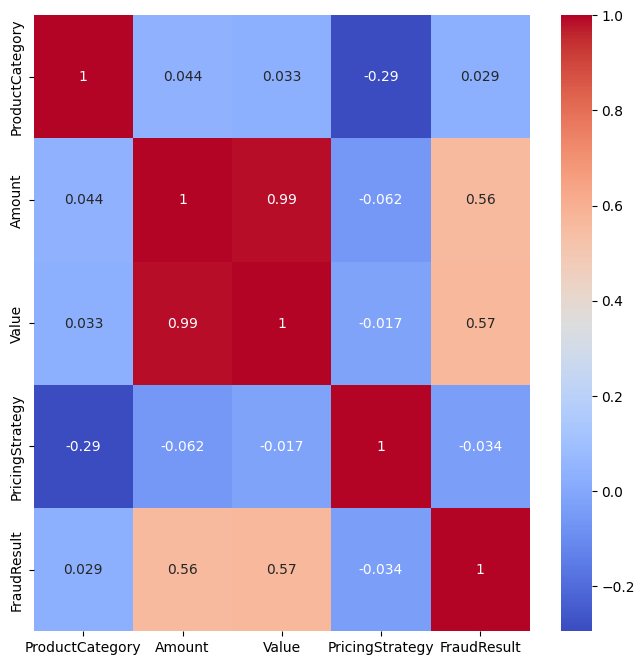

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# Step 1: Create Aggregate Features
aggregate_features = df.groupby('CustomerId').agg({
    'Amount': ['sum', 'mean', 'count', 'std']  # Total, Average, Count, Standard Deviation
}).reset_index()

# Rename columns for clarity
aggregate_features.columns = ['CustomerId', 'TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']

# Display aggregate features to check
print("Aggregate Features:")
print(aggregate_features.head())

# Step 2: Extract Features
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

# Display the modified data to check new columns
print("\nModified Data with Extracted Features:")
print(df.head())

# Step 3: Encode Categorical Variables
if 'Category' in df.columns:
    # One-Hot Encoding for 'Category'
    df = pd.get_dummies(df, columns=['Category'], drop_first=True)

if 'UserType' in df.columns:
    # Label Encoding for 'UserType'
    label_encoder = LabelEncoder()
    df['UserType'] = label_encoder.fit_transform(df['UserType'])

# Step 4: Handle Missing Values
# Imputation for numerical columns
num_imputer = SimpleImputer(strategy='mean')  # or median, most_frequent, etc.

# Check if aggregate features exist in the DataFrame
if 'TotalTransactionAmount' in aggregate_features.columns:
    df = df.merge(aggregate_features, on='CustomerId', how='left')

# Check for missing values in the aggregate features
print("\nChecking for missing values:")
print(df[['TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']].isnull().sum())

# Impute missing values for numerical columns
df[['TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']] = num_imputer.fit_transform(
    df[['TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']]
)

# Imputation for categorical columns if any
cat_imputer = SimpleImputer(strategy='most_frequent')
if 'UserType' in df.columns:
    df[['UserType']] = cat_imputer.fit_transform(df[['UserType']])

# Step 5: Normalize/Standardize Numerical Features
# Normalization
scaler = MinMaxScaler()
df[['TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']] = scaler.fit_transform(
    df[['TotalTransactionAmount', 'AverageTransactionAmount', 'TransactionCount', 'StdDevTransactionAmount']]
)

# Final DataFrame
print("\nFinal DataFrame:")
print(df.head())

Aggregate Features:
        CustomerId  TotalTransactionAmount  AverageTransactionAmount  \
0     CustomerId_1                -10000.0             -10000.000000   
1    CustomerId_10                -10000.0             -10000.000000   
2  CustomerId_1001                 20000.0               4000.000000   
3  CustomerId_1002                  4225.0                384.090909   
4  CustomerId_1003                 20000.0               3333.333333   

   TransactionCount  StdDevTransactionAmount  
0                 1                      NaN  
1                 1                      NaN  
2                 5              6558.963333  
3                11               560.498966  
4                 6              6030.478146  

Modified Data with Extracted Features:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  Subscriptio

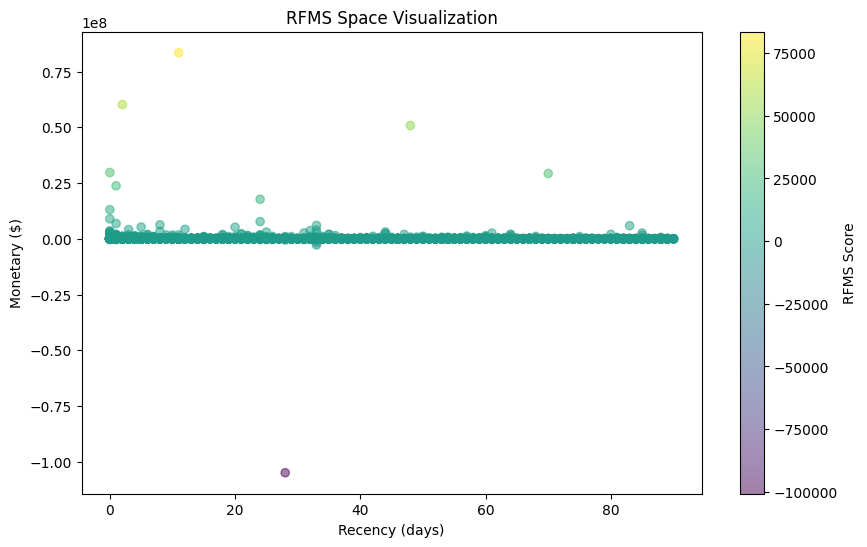

In [18]:
# Step 1: Define RFMS Variables
# Assuming 'TransactionDate' is in the dataset
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
current_date = df['TransactionStartTime'].max()

# Calculate Recency, Frequency, and Monetary
rfms = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (current_date - x.max()).days,  # Recency
    'TransactionId': 'count',  # Frequency
    'Amount': 'sum'  # Monetary
}).rename(columns={'TransactionStartTime': 'Recency', 'TransactionId': 'Frequency', 'Amount': 'Monetary'})

# Step 2: Calculate an RFMS Score
# You can define your scoring mechanism; here we will use a simple method
rfms['Score'] = (rfms['Frequency'] + rfms['Monetary'] / 1000) - rfms['Recency'] / 10  # Adjust weights as necessary

# Step 3: Visualize RFMS Space
plt.figure(figsize=(10, 6))
plt.scatter(rfms['Recency'], rfms['Monetary'], c=rfms['Score'], cmap='viridis', alpha=0.5)
plt.colorbar(label='RFMS Score')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary ($)')
plt.title('RFMS Space Visualization')
plt.show()

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_18316\2568053074.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_df = df.groupby('Bin').agg(
c:\Users\Admin.DESKTOP-M4R2VLU\week6\myven\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


                      Good  Bad  Total  Distribution_Good  Distribution_Bad  \
Bin                                                                           
(-100811.801, 1.284]     0  749    749           0.000000          0.285987   
(1.284, 18.3]            0  749    749           0.000000          0.285987   
(18.3, 47.375]           0  747    747           0.000000          0.285223   
(47.375, 131.9]        374  374    748           0.333037          0.142803   
(131.9, 83565.14]      749    0    749           0.666963          0.000000   

                           WoE  
Bin                             
(-100811.801, 1.284]  0.000000  
(1.284, 18.3]         0.000000  
(18.3, 47.375]        0.000000  
(47.375, 131.9]       0.846789  
(131.9, 83565.14]     0.000000  


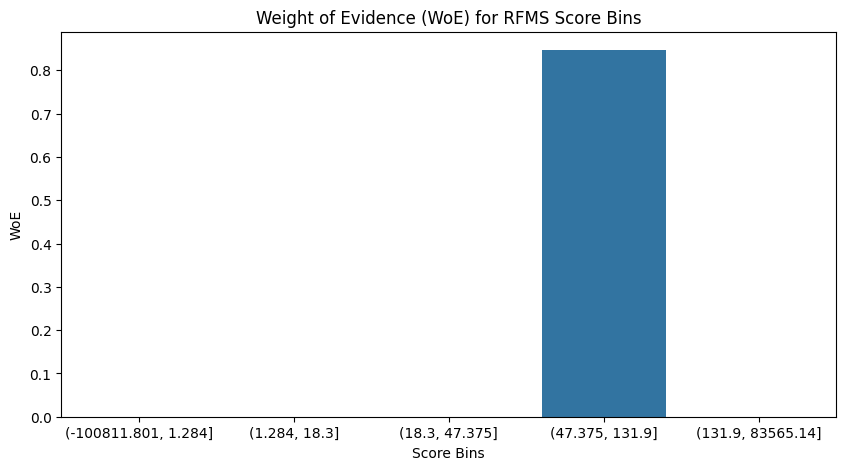

In [19]:
# Step 4: Classify Users
# Define a boundary for good and bad users based on score
threshold = rfms['Score'].quantile(0.7)  # e.g., top 30% as good
rfms['Label'] = np.where(rfms['Score'] >= threshold, 'Good', 'Bad')

# Step 5: Perform Weight of Evidence (WoE) Binning
def woe_binning(df, target, feature):
    bins = pd.qcut(df[feature], q=5, duplicates='drop')  # Create 5 quantile bins
    df['Bin'] = bins
    # Calculate WoE
    woe_df = df.groupby('Bin').agg(
        Good=('Label', lambda x: (x == 'Good').sum()),
        Bad=('Label', lambda x: (x == 'Bad').sum())
    )
    woe_df['Total'] = woe_df['Good'] + woe_df['Bad']
    woe_df['Distribution_Good'] = woe_df['Good'] / woe_df['Good'].sum()
    woe_df['Distribution_Bad'] = woe_df['Bad'] / woe_df['Bad'].sum()
    woe_df['WoE'] = np.log(woe_df['Distribution_Good'] / woe_df['Distribution_Bad']).replace([np.inf, -np.inf], 0)
    
    return woe_df

# Calculate WoE for RFMS Score
woe_result = woe_binning(rfms, 'Label', 'Score')
print(woe_result)

# Visualize WoE
plt.figure(figsize=(10, 5))
sns.barplot(x=woe_result.index.astype(str), y='WoE', data=woe_result)
plt.title('Weight of Evidence (WoE) for RFMS Score Bins')
plt.xlabel('Score Bins')
plt.ylabel('WoE')
plt.show()

In [20]:
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [21]:
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

In [22]:
var = train.drop(['FraudResult', 'ProductCategory'], axis = 1).columns
y_var = train['FraudResult']

def data_num(x, y):
  bin_object = Binning(y, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
  global breaks
  breaks = {}
  for i in x:
    bin_object.fit(train[[y, i]])
    breaks[i] = (bin_object.bins[1:-1].tolist())
  return breaks

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
# Define features and target
X = df.drop(columns=['FraudResult'])  
y = df['FraudResult']

# Check data types
print(X.dtypes)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create pipelines for both models
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression())])

random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('classifier', RandomForestClassifier())])

# Hyperparameter tuning for Logistic Regression
logistic_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(random_forest_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Model Evaluation
logistic_best = logistic_grid_search.best_estimator_
y_pred_logistic = logistic_best.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(f"Precision: {precision_score(y_test, y_pred_logistic)}")
print(f"Recall: {recall_score(y_test, y_pred_logistic)}")
print(f"F1 Score: {f1_score(y_test, y_pred_logistic)}")
print(f"ROC AUC: {roc_auc_score(y_test, logistic_best.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_logistic))

rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_rf))

TransactionId                            object
BatchId                                  object
AccountId                                object
SubscriptionId                           object
CustomerId                               object
CurrencyCode                             object
ProviderId                               object
ProductId                                object
ProductCategory                           int64
ChannelId                                object
Amount                                  float64
Value                                     int64
TransactionStartTime        datetime64[ns, UTC]
PricingStrategy                           int64
TransactionHour                           int32
TransactionDay                            int32
TransactionMonth                          int32
TransactionYear                           int32
TotalTransactionAmount                  float64
AverageTransactionAmount                float64
TransactionCount                        

In [25]:
import joblib

# Assume 'model' is your trained model
joblib.dump(logistic_best , 'model.joblib')

['model.joblib']